# テンソルの階数と形状を取得する

In [1]:
import tensorflow as tf
import numpy as np

/home/yokota/.local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [3]:
from __future__ import print_function, division
g = tf.Graph()

## 計算グラフを定義
with g.as_default():
    # テンソルt1, t2, t3を定義
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])
    
    ## テンソルt1, t2, t3の階数を取得
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    
    ## テンソルt1, t2, t3の形状を取得
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print('Shapes:', s1, s2, s3)

with tf.Session(graph=g) as sess:
    print('Ranks:', r1.eval(), r2.eval(), r3.eval())
    

Shapes: () (4,) (2, 2)
Ranks: 0 1 2


# TensorFlowの計算グラフ
TensorFlowは複数のノードからなるネットワークである計算グラフを使って入力から出力に至る前のテンソル間の関係を抽出する．

TensorFlowでの計算グラフの構築とコンパイルの手順は次のようになる.
1. 新しいからの計算グラフをインスタンス化する．
1. 計算グラフにノード(テンソルと演算)を追加する.
1. 計算グラフを実行する．
 1. 新しいセッションを開始する．
 1. 計算グラフの変数を初期化する．
 1. このセッションで計算グラフを実行する.
 
 例としてz=2*(a-b)+cを評価するための計算グラフを作成する．
 
 a,b,cはスカラーであり，ここではTensorFlowの定数として定義する．計算グラフを作成するには，tf.Graph()を呼び出し，続いてノードを追加する．


In [4]:
g = tf.Graph()

## 計算グラフにノードを追加
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2 * (a - b) + c

## 計算グラフを起動
with tf.Session(graph=g) as sess:
    print('2*(a-b)+c =>', sess.run(z))

2*(a-b)+c => 1


#### **TensorFlowでは計算グラフのコンテキスト内でテンソルと演算を定義することを覚えておく**
#### そして計算グラフの演算の実行と結果の取得・評価にはTensorFlowセッションを使用する

# TensorFlowのプレースホルダ

プレースホルダは特定の型と形状に基づいて事前に定義されたテンソルである．

ここでは次の項目について説明する．
- 計算グラフでプレースホルダを定義する方法
- 実行時にプレースホルダにデータを供給する方法
- 形状が不明なプレースホルダを定義する方法

## プレースホルダの定義
まず，z=2*(a-b)+cを評価する単純な例を見てみる．今回はスカラーa,b,cにプレースホルダを使用する．

In [5]:
g = tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(tf.int32, shape=[], name='tf_c')
    # 中間のテンソルを格納
    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c

このコードではスカラーを扱ったのでプレースホルダの形状はshape=[]とした．ただし，より高次元のプレースホルダを定義するのは非常に簡単である．

たとえば，階数が3，形状が3x4x5のプレースホルダをfloat型で定義する方法は次のようになる．
```python
tf.placeholder(dtype=tf.float32, shape=[2, 3, 4])
```

## プレースホルダにデータを供給する

計算グラフのノードを実行するときには，プレースホルダの値としてデータ配列を供給するために，Pythonのディクショナリを作成する必要がある．

このディクショナリは，プレースホルダの型と形状に従って作成され，TensorFlowセッションのrunメソッドの入力パラメータfeed_dictに引数として渡される．

In [6]:
# 先の計算グラフを起動
with tf.Session(graph=g) as sess:
    feed = {tf_a:1, tf_b:2, tf_c:3}
    print('z:', sess.run(z, feed_dict=feed))

z: 1


## 様々なバッチサイズに合わせてプレースホルダを定義する

プレースホルダの便利な特徴の一つは，次元の大きさが可変である場合にNoneを指定できる事である．

例えば，1つ目の次元が不明，または可変の階数2のプレースホルダを作成する方法は次のようになる．

In [7]:
g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(tf.float32, shape=[None, 2], name='tf_x')
    x_mean = tf.reduce_mean(tf_x, axis=0, name='mean')

In [8]:
np.random.seed(123)
np.set_printoptions(precision=2)

with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0, high=1, size=(5, 2))
    print('Feeding data with shape', x1.shape)
    print('Result:',sess.run(x_mean, feed_dict={tf_x: x1}))
    x2 = np.random.uniform(low=0, high=1, size=(10, 2))
    print('Feeding data with shape', x2.shape)
    print('Result:',sess.run(x_mean, feed_dict={tf_x: x2}))

Feeding data with shape (5, 2)
Result: [0.62 0.47]
Feeding data with shape (10, 2)
Result: [0.46 0.49]


In [9]:
print(tf_x)

Tensor("tf_x:0", shape=(?, 2), dtype=float32)


# TensorFlowの変数

TensorFlowの変数はトレーニング中にモデルのパラメータの格納や更新を可能にする特殊なテンソルオブジェクトである．

ここでは，次の項目について説明する．
- 計算グラフで変数を定義する方法
- セッションで変数を初期化する方法
- いわゆる「変数スコープ」を使って変数をまとめる方法
- 既存の変数を再利用する方法

## 変数を定義する

TensorFlowの変数は，ニューラルネットワークの入力層，隠れ層，出力層の重みなど，トレーニング中に更新することが可能なモデルのパラメータを格納する．変数を定義するときには，テンソルの値で初期化する必要がある．

TensorFlowで変数を定義する方法は２つある．
- tf.Variable(<初期値>, name="<変数名>")
 - 新しい変数を表すオブジェクトを作成して計算グラフに追加
 - shape(形状)とdtype(型)を**明示的に設定する方法はないこと**に注意
 - 形状と型は初期値のものと同じに設定される
- tf.get_variable("<変数名>", ...>
 - 既存の変数を特定の名前で**再利用**するために使用できる
 - その名前が計算グラフに存在しない場合は新しい変数が作成される
 - そのため，名前は非常に重要であり，変数の第一引数が名前になっている
 - shapeとdtypeを明示的に設定できるが，これは新しい変数を作成するときのみ必要になる
 
 tf.get_variableには，tf.Variableよりも有利な点が2つある．
 - 既存の変数を再利用できる，さらにこの関数はXavier/Glorot初期化をデフォルトで使用する
 - イニシャライザの他にもテンソルを制御するためのパラメータが定義されている(ex.変数に対して正則化を追加可能)
 
 どちらの初期化手法でも，tf.Sessionで計算グラフを起動し，そのセッションでイニシャライザを明示的に実行しない限り，初期値が設定されないことに注意しなければならない．
 
 変数オブジェクトを作成する方法は次のようになる．変数の初期値はnp.ndarrayから作成され，型は自動的に**推論**される．

In [10]:
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1, 2, 3, 4], [5, 6, 7, 8]]), name='w')
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>


## 変数を初期化する

ここで重要となるのは，**変数として定義されたテンソルのメモリが確保されるのが変数の初期化時である**ということ，そして**それまでは変数に値が含まれていないこと**である．

このため，計算グラフのノードを実行する前に，そのノードへのパス上にある変数を初期化しなければならない．

この変数の初期化プロセスでは，関連するテンソルのメモリを確保し，それらのテンソルに初期化処理を割り当てる．TensorFlowには，tf.global_variables_initializerという関数がある．この関数は，計算グラフに存在する変数を全て初期化するための演算子を返す．
この演算子を実行すると，変数が次のように初期化される．

In [11]:
with tf.Session(graph=g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


また，init_op = tf.global_variables_initializer()を使用するなどして，この演算子をオブジェクトに格納しておき，あとからsess.run(init_op)またはinit_op.run()を使って実行することも出来る．

ただし，この演算子が作成されるタイミングが，**すべての変数が定義された後になるようにする必要がある．**

例えば，次のコードでは，変数w1，演算子init_op，変数w2をこの順序で定義している．

In [12]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name='w1')
    init_op = tf.global_variables_initializer()
    w2 = tf.Variable(2, name='w2')

In [13]:
# w1の評価はうまくいく
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w1:', sess.run(w1))

w1: 1


In [14]:
# w2の評価は失敗する
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print('w2:', sess.run(w2))

FailedPreconditionError: Attempting to use uninitialized value w2
	 [[Node: _retval_w2_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](w2)]]

## 変数スコープ

変数スコープを利用すれば変数を別々のグループにまとめることが出来る．

In [19]:
g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape=(20,10)), name='weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


## 変数を再利用する

少し複雑なニューラルネットワークモデルを開発している場面を想像する．このモデルには，入力データが複数のソースから提供される分類器が含まれている．

例えば，ソースAから$(X_{A}, y_{A})$というデータが提供され，ソースBから$(X_{B}, y_{B})$というデータが提供されるとする．

この例では，1つのソースからのデータだけを，ネットワークを構築するための入力テンソルとして使用するような方法で，計算グラフを設計する．そして，もうひとつのソースからのデータは，同じ分類器に供給することが出来る．

次の例では，ソースAからのデータがプレースホルダを通じて供給され，ソースBからのデータがジェネレータネットワークの出力であると仮定する．

ジェネレータネットワークを構築するにはgeneratorスコープでbuild_generator関数を呼び出す．続いて，classifierスコープでbuild_classifier関数を呼び出すことで，分類器を追加する．

In [23]:
# 分類器を構築するヘルパー関数
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name='weights',
                              shape=(data_shape[1], n_classes),
                              dtype=tf.float32)
    bias = tf.get_variable(name='bias', initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    return logits, tf.nn.softmax(logits)

# ジェネレータを構築するヘルパ関数
def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name='output')
    return output, tf.nn.sigmoid(output)

# 計算グラフの構築
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                          dtype=tf.float32,
                          name='tf_X')
    # ジェネレータを構築
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
        
    # 分類器を構築
    with tf.variable_scope('classifier') as scope:
        # 元のデータに対する分類器
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        # 生成されたデータに対して分類器を再利用
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))
        init_op = tf.global_variables_initializer()

あるいは，tf.variable_scope()のreuseパラメータにTrueを指定するという方法でも変数を再利用できる．

# 回帰モデルの構築

線形回帰モデル$\hat{y}=w\times x+b$を実装する．

次に，テンソルの数学的表記とコーディング時の名前をまとめる．
- 入力$x$：プレースホルダtf_x
- 入力$y$：プレースホルダtf_y
- モデルのパラメータ$w$：変数weight
- モデルのパラメータ$b$：変数bias
- モデルの出力$\hat{y}$：回帰モデルを使って予測値を計算するために，TensorFlowの演算によって返されるy_hat

In [24]:
g = tf.Graph()
with g.as_default():
    tf.set_random_seed(123)
    
    # プレースホルダを定義
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_x')
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name='tf_y')
    
    # 変数(モデルのパラメータ)を定義
    weight = tf.Variable(tf.random_normal(shape=(1, 1), stddev=0.25), name='weight')
    bias = tf.Variable(0.0, name='bias')
    
    # モデルを構築
    y_hat = tf.add(weight * tf_x, bias, name='y_hat')
    
    # コストを計算
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name='cost')
    
    # モデルをトレーニング
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name='train_op')

モデルのトレーニングを行う前に，テンソルを評価する方法と演算を実行する方法を見ておく．

ここでは，make_random_data関数を使って特徴量が1つのランダムな回帰データを作成し，このデータを可視化する．

In [25]:
# 回帰用の単純なランダムデータセットを作成
import matplotlib.pyplot as plt
np.random.seed(0)

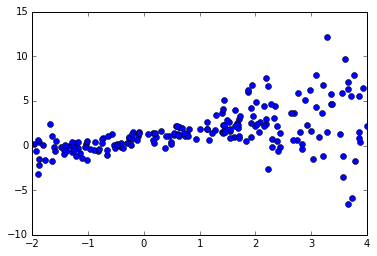

In [26]:
def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t * t / 3), size=None)
        y.append(r)
    return x, 1.726 + x -0.84 + np.array(y)

x, y = make_random_data()
plt.plot(x, y, 'o')
plt.show()

次にモデルのトレーニングを行う．

変数の初期化を行った後にtrain_opを実行しながらトレーニングコストを計算するforループを作成すれば良い．

Epoch   0:9.0677
Epoch  50:6.5291
Epoch 100:5.3627
Epoch 150:4.8214
Epoch 200:4.5656
Epoch 250:4.4409
Epoch 300:4.3768
Epoch 350:4.3415
Epoch 400:4.3200
Epoch 450:4.3055


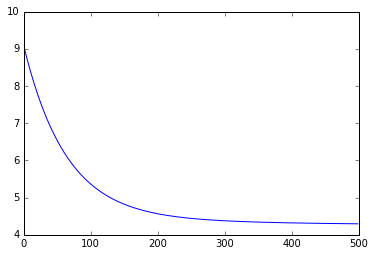

In [28]:
# トレーニングデータとテストデータに分割
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    # 変数を初期化
    sess.run(tf.global_variables_initializer())
    
    # 500エポックでモデルをトレーニング
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x:x_train, tf_y:y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch{:4d}:{:.4f}'.format(e, c))

plt.plot(training_costs)
plt.show()




# TensorFlowでのモデルの保存と復元

学習済みのモデルはSessionを抜けるとメモリ上から解放されてしまう．

そのため，後からテストデータを適用するような場面では学習済みモデルを保存しておくことである．

それは計算グラフにtf.train.Saverクラスのインスタンスを新たなノードとして追加することにより実現される．

その後，saver.save()を呼び出すことにより，.data, .index, .metaという拡張子がついた3角ファイルが作成される．
TensorFlowは構造化データのシリアライズに言語非依存のフォーマットであるProtocolBuffersを使用する．

In [29]:
# 計算グラフにsaverを追加
with g.as_default():
    saver = tf.train.Saver()
    
n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    # 変数を初期化
    sess.run(tf.global_variables_initializer())
    
    # 500エポックでモデルをトレーニング
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x:x_train, tf_y:y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch{:4d}:{:.4f}'.format(e, c))
    saver.save(sess, 'model/trained-model')

Epoch   0:9.0677
Epoch  50:6.5291
Epoch 100:5.3627
Epoch 150:4.8214
Epoch 200:4.5656
Epoch 250:4.4409
Epoch 300:4.3768
Epoch 350:4.3415
Epoch 400:4.3200
Epoch 450:4.3055


トレーニング済みモデルを復元する手順は次の２つである．
1. モデルを保存した時と同じノードと名前で構成された計算グラフを再構築する
1. 保存された変数を新しいtf.Session環境で復元する

手順1では，モデルを保存した時と同じようにコードを実行して計算グラフgを構築すればよい．

だが，もっと簡単な方法がある．計算グラフに関する情報は全て.metaファイルにメタデータとして保存されている．
次のコードを使用すれば，.metaファイルからメタデータをインポートすることで，計算グラフを再構築できる．

INFO:tensorflow:Restoring parameters from model/trained-model


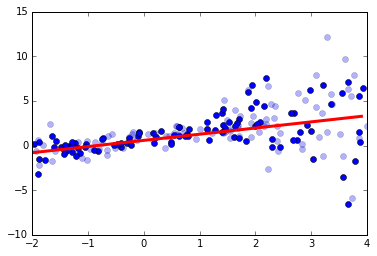

In [30]:
g2 = tf.Graph()

x_arr = np.arange(-2, 4, 0.1)

with tf.Session(graph=g2) as sess:
    # 計算グラフを再構築
    new_saver = tf.train.import_meta_graph('model/trained-model.meta')
    # セッションを復元
    new_saver.restore(sess, 'model/trained-model')
    # 実行(y_hatというPythonの変数名でなく，y_hat:0 (:0は自動的に付加)というTensorFlowでの名前を指定)
    y_arr = sess.run('y_hat:0', feed_dict={'tf_x:0':x_arr})

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)
plt.show()

# テンソルを多次元配列として変換する

In [31]:
g = tf.Graph()

with g.as_default():
    arr = np.array([[1.0, 2.0, 3.0, 3.5],
                    [4.0, 5.0, 6.0, 6.5],
                    [7.0, 8.0, 9.0, 9.5]])
    T1 = tf.constant(arr, name='T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is ', s)
    
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    
    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is  (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


In [32]:
s.as_list()

[3, 4]

In [34]:
s

TensorShape([Dimension(3), Dimension(4)])

次にテンソルの形状を変更する方法を見てみる．numpyではnp.reshapeやarr.reshapeを使用できるが，TensorFlowでも同様にtf.reshape関数を使用する．

numpyと同様に1つの次元を-1に設定すると，新しい次元の大きさは配列全体の大きさと残りの指定された次元に基づいて推定される．

次のコードでは，テンソルT1の形状をT4とT5に変更する．T4,T5はどちらも階数3のテンソルである．

In [35]:
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1], name='T4')
    print(T4)
    T5 = tf.reshape(T1, shape=[1, 3, -1], name='T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [36]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


配列の転置はtf.transposeを使用する．

tf.transpose関数では，通常の転置演算に加えて，次元の順番を任意に入れ替えることも出来る．その場合は順番をperm=[...]で指定する．

In [38]:
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], name='T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0, 2, 1], name='T7')
    print(T7)
    
with tf.Session(graph=g) as sess:
    print(sess.run(T6))
    print()
    print(sess.run(T7))

Tensor("T6_1:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7_1:0", shape=(1, 4, 3), dtype=float64)
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]]

[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]]


次に，テンソルをサブテンソルのリストに分割することも出来る．これにはtf.split関数を使用する．

In [39]:
with g.as_default():
    t5_split = tf.split(T5, num_or_size_splits=2, axis=2, name='T8')
    print(t5_split)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [44]:
with tf.Session(graph=g) as sess:
    print(sess.run('T8:0'))
    print()
    print(sess.run('T8:1'))

[[[1. 2.]
  [4. 5.]
  [7. 8.]]]

[[[3.  3.5]
  [6.  6.5]
  [9.  9.5]]]


最後に，複数のテンソルの連結も有益な変換の1つである．それぞれ同じ形状と型をもつテンソルのリストがある場合は，それらのテンソルを1つの大きなテンソルにまとめることができる．

次に示すように，これにはtf.concat関数を使用する．

In [46]:
g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape=(5, 1), dtype=tf.float32, name='t1')
    t2 = tf.zeros(shape=(5, 1), dtype=tf.float32, name='t2')
    print(t1)
    print(t2)
    
with g.as_default():
    t3 = tf.concat([t1, t2], axis=0, name='t3')
    print(t3)
    t4 = tf.concat([t1, t2], axis=1, name='t4')
    print(t4)

with tf.Session(graph=g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# 計算グラフの構築に制御フローを使用する

TensorFlowには，計算グラフの構築時に意思決定を行うためのメカニズムがある．

ただし，計算グラフの構築にPythonの制御フロー文を使用する場合と比較して，TensorFlowの制御フロー関数には微妙な違いがいくつかある．

単純なサンプルコードを使ってそれらの違いを具体的に示すために，TensorFlowで次式を実装することについて考えてみよう．


$$
res = \left\{
\begin{array}{ll}
x+y & (x \lt y) \\
x-y & (x \geq y)
\end{array}
\right.
$$


単にPythonのif文を使って上式に相当する計算グラフを構築する方法は，次のようになる．

In [47]:
x, y = 1.0, 2.0
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')
    
    if x < y:
        res = tf.add(tf_x, tf_y, name='result_add')
    else:
        res = tf.subtract(tf_x, tf_y, name='result_sub')
    print('Object:', res)

with tf.Session(graph=g) as sess:
    print('x < y:{} -> Result:'.format(x < y), res.eval(feed_dict={'tf_x:0':x, 'tf_y:0':y}))
    x, y = 2.0, 1.0
    print('x < y:{} -> Result:'.format(x < y), res.eval(feed_dict={'tf_x:0':x, 'tf_y:0':y}))
        
    

Object: Tensor("result_add:0", dtype=float32)
x < y:True -> Result: 3.0
x < y:False -> Result: 3.0


このコードで示したとおり，どちらも加算が行われている．

つまり，TensorFlowの計算グラフは静的であり，計算グラフが構築された後は実行プロセスが終了するまで変化しないままとなる．

次に，TensorFlowの制御フローメカニズムを試してみる．次のコードでは，Pythonのif文の代わりにtf.cond関数を使用することで上式を実装する．

In [48]:
x, y = 1.0, 2.0
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')
    
    res = tf.cond(tf_x < tf_y,
                  lambda: tf.add(tf_x, tf_y, name='result_add'),
                  lambda: tf.subtract(tf_x, tf_y, name='result_sub'))
    
    print('Object:', res)

with tf.Session(graph=g) as sess:
    print('x < y:{} -> Result:'.format(x < y), res.eval(feed_dict={'tf_x:0':x, 'tf_y:0':y}))
    x, y = 2.0, 1.0
    print('x < y:{} -> Result:'.format(x < y), res.eval(feed_dict={'tf_x:0':x, 'tf_y:0':y}))
        
    

Object: Tensor("cond/Merge:0", dtype=float32)
x < y:True -> Result: 3.0
x < y:False -> Result: 1.0


このコードの出力に示されているように，resオブジェクトは"cond/Merge:0"という名前のテンソルである．

この場合の計算グラフは，2つの分岐と，実行時にどちらの分岐に進むのかを判断するメカニズムで構成されている．

TensorFlowではtf.cond関数の他にもtf.caseや，tf.while_loopといった制御フロー関数を提供している．
例えば，tf.caseはTensorFlowにおいてPythonのif...else文に相当する．次に示すPythonの式について考えてみる．

In [49]:
if (x < y):
    result = 1
else:
    result = 0

このコードに相当する条件分岐を，TensorFlowの計算グラフで実装する場合，次のようにtf.caseを使用する．

In [50]:
f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)
result = tf.case([(tf.less(x, y), f1)], default=f2)

また，TensorFlowの計算グラフで，変数iの値を1からしきい値(threshold)までインクリメントするループ処理は次のようにtf.while_loopを使用する．(tf.while_loopでは，cond=cの値がtrueの間，body=bの処理が行われる)

In [51]:
i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i, 100)
b = lambda i: tf.add(i, 1)
r = tf.while_loop(cond=c, body=b, loop_vars=[i])

TensorFlowの様々な制御フロー演算子については，TensorFlowの公式ドキュメントに詳しい説明がある．

ところで，これらの計算グラフはTensorBoardによって生成されたものである．次節では，計算グラフを可視化するTensorBoardを詳しく見ていく.

# 計算グラフをTensorBoardで可視化する

TensorBoardは，計算グラフとモデルの学習を可視化するためのモジュールである．計算グラフを可視化すれば，ノード間の結合を確認し，ノードの依存関係を調べて，必要であればモデルをデバッグすることも出来る．

早速，本章で構築したニューラルネットワークを可視化してみる．

このニューラルネットワークはジェネレータと分類器で構成されている．ここでは2つのヘルパー関数build_generatorとbuild_classifierを再び使用する．これらのヘルパー関数を使用して，計算グラフを次のように構築する．

In [52]:
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                          dtype=tf.float32,
                          name='tf_X')
    # ジェネレータを構築
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)
    
    # 分類器を構築
    with tf.variable_scope('classifier') as scope:
        # 元のデータに対する分類器
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))
        # 生成されたデータに対して分類器を再利用
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))
        
# 計算グラフを可視化
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter(logdir='logs/', graph=g)

In [ ]:
!tensorboard --logdir logs/

/home/yokota/.local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
TensorBoard 1.10.0 at http://yokota-H81M-DS2V:6006 (Press CTRL+C to quit)
